In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score


from tensorflow.keras.datasets import fashion_mnist


Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [49]:
# X, y = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Training dataset shape X: (60000, 28, 28) y: (60000,)
Testing dataset shape X: (10000, 28, 28) y: (10000,)
This is articles image Dataset with 10 classes as [9 0 0 3 0 2 7 2 5 5]
Lets visualize first 10 images with labels


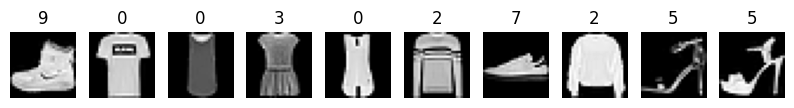

In [50]:
print("Training dataset shape X:", X_train.shape, "y:", y_train.shape)
print("Testing dataset shape X:", X_test.shape, "y:", y_test.shape)
print("This is articles image Dataset with 10 classes as", y_train[:10])
print("Lets visualize first 10 images with labels")

plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [51]:
# Normalize and reshape the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("\nConvert labels to categorical, only if using categorical crossentropy loss function")
print("In this case we will use sparse_categorical_crossentropy loss function, so we will not convert labels to categorical \n")
# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

print("Dataset shape X:", X_train.shape, "y:", y_train.shape)
print("Unlike MNIST dataset, we keep the shape of X as 28*28 and use Flatten layer at beginning of the model to achieve the same")


Convert labels to categorical, only if using categorical crossentropy loss function
In this case we will use sparse_categorical_crossentropy loss function, so we will not convert labels to categorical 

Dataset shape X: (60000, 28, 28) y: (60000,)
Unlike MNIST dataset, we keep the shape of X as 28*28 and use Flatten layer at beginning of the model to achieve the same


In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("Training dataset shape X:", X_train.shape, "y:", y_train.shape)
print("Validation dataset shape X:", X_val.shape, "y:", y_val.shape)
print("Testing dataset shape X:", X_test.shape, "y:", y_test.shape)

y_test[:10]

Training dataset shape X: (48000, 28, 28) y: (48000,)
Validation dataset shape X: (12000, 28, 28) y: (12000,)
Testing dataset shape X: (10000, 28, 28) y: (10000,)


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Building ANN Model with 
- optimizer: adam (Adaptive Moment Estimation) combines benefits of two other popular optimization algorithms Adagrad and RMSProp making efficient and adaptive choice.
- loss: sparse_categorical_crossentropy because we've predicting number (output) here that is not one-hot encoded.

In [53]:

# Baseline ANN model
def build_baseline():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_baseline()
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7734 - loss: 0.6509 - val_accuracy: 0.8631 - val_loss: 0.3915
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8557 - loss: 0.3985 - val_accuracy: 0.8720 - val_loss: 0.3583
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8687 - loss: 0.3534 - val_accuracy: 0.8726 - val_loss: 0.3509
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8817 - loss: 0.3223 - val_accuracy: 0.8741 - val_loss: 0.3463
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8864 - loss: 0.3048 - val_accuracy: 0.8803 - val_loss: 0.3306
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8909 - loss: 0.2928 - val_accuracy: 0.8894 - val_loss: 0.3131
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.2766 - val_accuracy: 0.8785 - val_loss: 0.3248
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9035 - loss: 0.2637 - 

In [54]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation loss:", val_loss, "Validation accuracy:", val_acc)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:      ", test_loss, "Test accuracy:     ", test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8868 - loss: 0.3174
Validation loss: 0.30817654728889465 Validation accuracy: 0.8923333287239075
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.3425
Test loss:       0.34217286109924316 Test accuracy:      0.8819000124931335


---
---

Incorporating `BatchNormalization()` and `Dropout(0.4)` between dense layers is a great way to improve your model's performance and stability. Let's dive into what each component does, how it impacts the learning process, and its effects on predictions.

---

### **1. BatchNormalization()**
- **What it does:**
  Batch normalization normalizes the inputs of a layer by adjusting and scaling the activations. It standardizes the values to have a mean of 0 and a standard deviation of 1 within each mini-batch. This normalization ensures that the network learns in a stable manner.

- **Impact on Learning Process:**
  1. **Accelerates Convergence:** By reducing internal covariate shift (changes in layer input distributions during training), it speeds up learning.
  2. **Stabilizes Training:** Ensures that the activations remain within a manageable range, reducing the risk of exploding or vanishing gradients.
  3. **Reduces Sensitivity to Initialization:** Makes the network less dependent on careful weight initialization.

- **Impact on Prediction:**
  The model generalizes better since it learns more robust features. Predictions are less sensitive to slight variations in input data.

---

### **2. Dropout(0.4)**
- **What it does:**
  Dropout randomly sets a fraction (in this case, 40%) of neurons to 0 during training to prevent over-reliance on specific nodes.

- **Impact on Learning Process:**
  1. **Regularization:** Reduces the chance of overfitting by forcing the network to learn redundant, distributed representations of features.
  2. **Noise Resilience:** Adds a form of noise during training, which makes the network robust to data variations.
  3. **Slows Down Learning Slightly:** As some neurons are "dropped," the network has to work harder to optimize.

- **Impact on Prediction:**
  Dropout is only active during training, not inference. At inference time, all neurons are used, and their outputs are scaled to account for the training dropout rate. This leads to better generalization and robust predictions on unseen data.

---

### **Combined Effect**
By integrating `BatchNormalization()` and `Dropout(0.4)` together:
1. **BatchNormalization** improves learning stability and speeds up convergence.
2. **Dropout** reduces overfitting and ensures robust feature learning.
3. Together, they create a balance: Batch normalization focuses on stabilization, while dropout prevents overfitting.

---

In [55]:
def build_with_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'), # Changing first ANN layer from last time 128, relu to 256, relu
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

reg_model = build_with_regularization()

reg_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,682 (924.54 KB)

 Trainable params: 235,914 (921.54 KB)

 Non-trainable params: 768 (3.00 KB)

In [56]:
reg_history = reg_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7275 - loss: 0.7910 - val_accuracy: 0.8427 - val_loss: 0.4253
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8122 - loss: 0.5253 - val_accuracy: 0.8461 - val_loss: 0.4246
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8195 - loss: 0.4983 - val_accuracy: 0.8577 - val_loss: 0.3828
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8341 - loss: 0.4599 - val_accuracy: 0.8570 - val_loss: 0.3841
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8368 - loss: 0.4582 - val_accuracy: 0.8537 - val_loss: 0.3996
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8417 - loss: 0.4352 - val_accuracy: 0.8665 - val_loss: 0.3732
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8432 - loss: 0.4320 - val_accuracy: 0.8687 - val_loss: 0.3661
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8466 - loss: 0.4246 - 

In [57]:
# Evaluate the model: reg_model
val_loss, val_acc = reg_model.evaluate(X_val, y_val)
test_loss, test_acc = reg_model.evaluate(X_test, y_test)
print("Validation loss:", val_loss, "Validation accuracy:", val_acc)
print("Test loss:      ", test_loss, "Test accuracy:     ", test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8742 - loss: 0.3484
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8677 - loss: 0.3798
Validation loss: 0.34136903285980225 Validation accuracy: 0.8774166703224182
Test loss:       0.38258805871009827 Test accuracy:      0.8636000156402588


### **visualize the training and validation curves** 
to observe overfitting/generalization behavior with and without regularization.

---

### 📌 What to Look For:

| Observation                         | Interpretation                            |
|-------------------------------------|--------------------------------------------|
| Training acc ↑, val acc ↓          | Overfitting (consider regularization)      |
| Training and val acc both ↑ steadily | Healthy learning                           |
| Val acc flat / oscillating         | Might need LR tuning or more data/epochs   |
| Val loss increases while val acc stays | May be instability in softmax logits       |

---

Let me know once you're ready and we’ll proceed with **manual tuning of learning rate and batch size**.

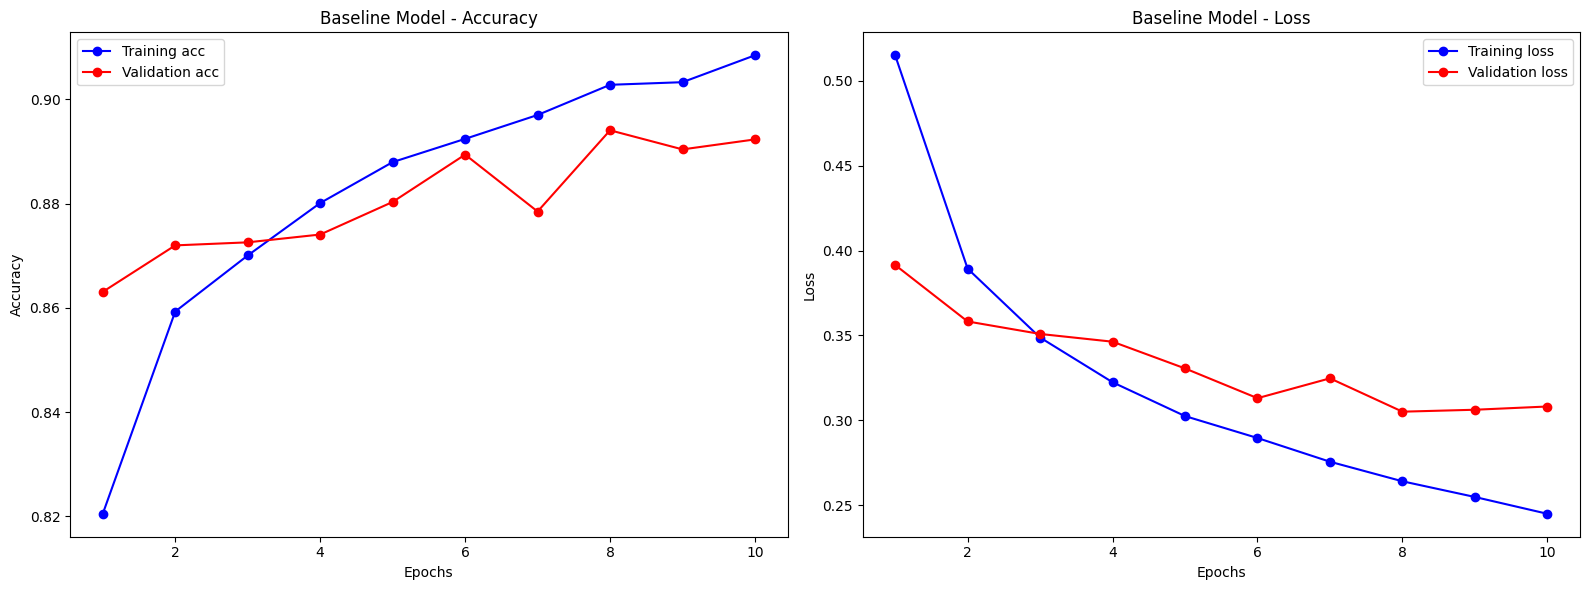

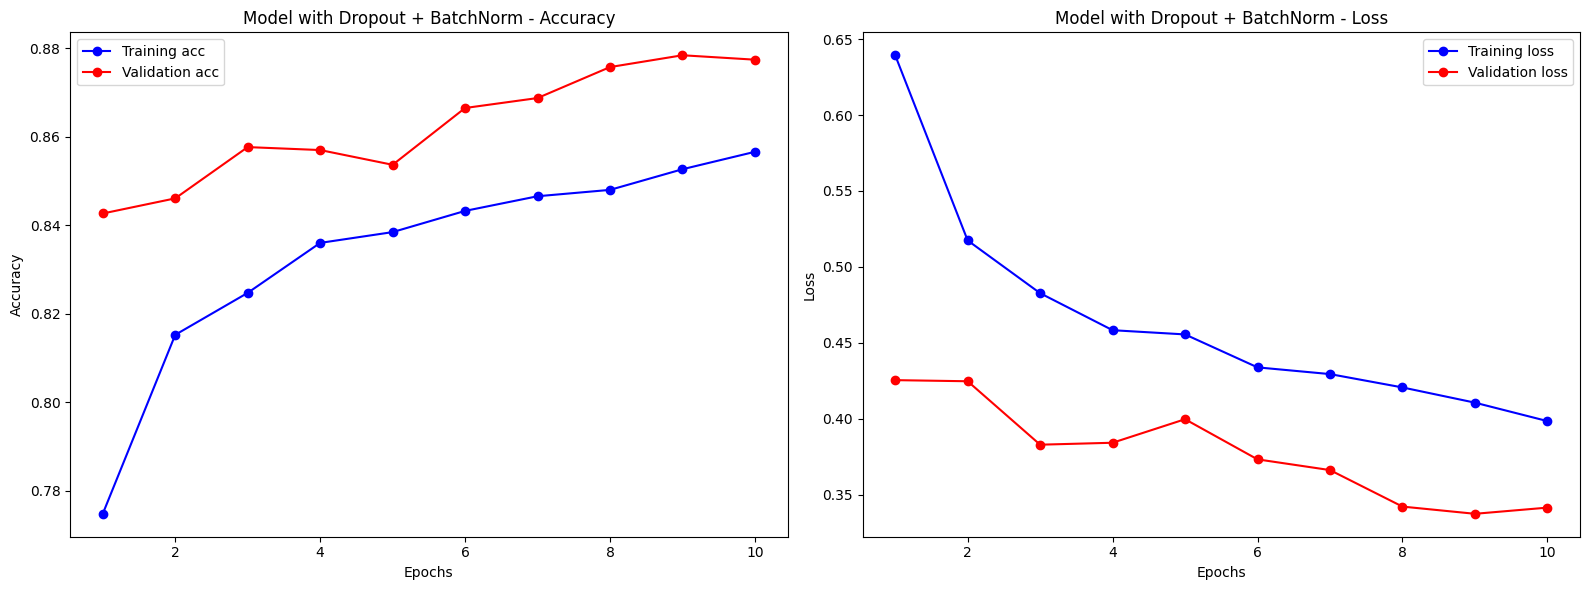

In [58]:
import matplotlib.pyplot as plt

def plot_training_curves(history, title='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example:
plot_training_curves(history, 'Baseline Model')
plot_training_curves(reg_history, 'Model with Dropout + BatchNorm')


---

✅ What We’ll Do NEXT:
1. Train the same model with different learning rates (e.g., 0.1, 0.01, 0.001, 0.0001)

2. For each learning rate, try different batch sizes (e.g., 16, 32, 64)

3. Plot validation accuracy and loss to compare results

### Building ANN Model with learning rate optimization
- optimizer: adam (Adaptive Moment Estimation) combines benefits of two other popular optimization algorithms Adagrad and RMSProp making efficient and adaptive choice.
    - Adam adjusts the learning rate for each parameter(weight) dynamically during training that results fast covergence 

- Change in layers: Remove BatchNormalization.

### 🤔 Why we removed **BatchNormalization** (but not Dropout)?

#### 🔬 BatchNorm is **sensitive** to learning rate  
- **Batch Normalization normalizes activations**, which changes how gradients flow.
- It can lead to **faster and more stable convergence** — but it interacts closely with learning rate.
- **Too high a learning rate** with BatchNorm can cause exploding gradients or instability.
- So when tuning `lr`, BatchNorm can **mask or alter the effect** of `lr`.

That’s why:
> 💡 We temporarily remove **BatchNorm** to isolate `lr`'s direct effect.

---

#### 💦 Dropout is **less sensitive** to learning rate  
- Dropout randomly disables neurons during training.
- It **doesn’t change the gradient scale**, just makes learning noisy.
- You can still clearly observe the effect of learning rate even when Dropout is active.
- Dropout **adds regularization noise**, but it doesn’t interfere with learning rate tuning as much.

---


In [59]:
def build_model_with_lr(lr=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [60]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]

results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nTraining with lr={lr}, batch_size={batch_size}")
        model = build_model_with_lr(lr)
        history = model.fit(X_train, y_train,
                            epochs=10,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            verbose=0)
        val_acc = history.history['val_accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        results[(lr, batch_size)] = (val_acc, val_loss)
        print(f"Validation Acc: {val_acc:.4f}, Val Loss: {val_loss:.4f}")



Training with lr=0.1, batch_size=16
Validation Acc: 0.1008, Val Loss: 2.3233

Training with lr=0.1, batch_size=32
Validation Acc: 0.1002, Val Loss: 2.3132

Training with lr=0.1, batch_size=64
Validation Acc: 0.1002, Val Loss: 2.3058

Training with lr=0.01, batch_size=16
Validation Acc: 0.7835, Val Loss: 0.6999

Training with lr=0.01, batch_size=32
Validation Acc: 0.8189, Val Loss: 0.5948

Training with lr=0.01, batch_size=64
Validation Acc: 0.8333, Val Loss: 0.5019

Training with lr=0.001, batch_size=16
Validation Acc: 0.8857, Val Loss: 0.3193

Training with lr=0.001, batch_size=32
Validation Acc: 0.8806, Val Loss: 0.3185

Training with lr=0.001, batch_size=64
Validation Acc: 0.8873, Val Loss: 0.3106

Training with lr=0.0001, batch_size=16
Validation Acc: 0.8882, Val Loss: 0.3121

Training with lr=0.0001, batch_size=32
Validation Acc: 0.8820, Val Loss: 0.3279

Training with lr=0.0001, batch_size=64
Validation Acc: 0.8826, Val Loss: 0.3306


In [61]:
results

{(0.1, 16): (0.10083333402872086, 2.3233067989349365),
 (0.1, 32): (0.1002499982714653, 2.313222885131836),
 (0.1, 64): (0.1002499982714653, 2.305783748626709),
 (0.01, 16): (0.7835000157356262, 0.6999008655548096),
 (0.01, 32): (0.8189166784286499, 0.5947686433792114),
 (0.01, 64): (0.8333333134651184, 0.5019292235374451),
 (0.001, 16): (0.8856666684150696, 0.3193286657333374),
 (0.001, 32): (0.8805833458900452, 0.3185167610645294),
 (0.001, 64): (0.8872500061988831, 0.310634583234787),
 (0.0001, 16): (0.8881666660308838, 0.3121037781238556),
 (0.0001, 32): (0.8820000290870667, 0.32794177532196045),
 (0.0001, 64): (0.8825833201408386, 0.3306445777416229)}

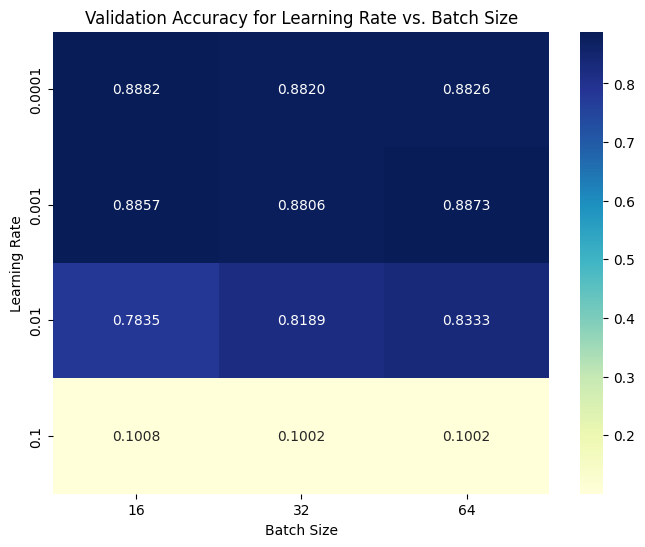

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `results` is already populated as {(lr, batch_size): (val_acc, val_loss)}
learning_rates = sorted(set([k[0] for k in results.keys()]))
batch_sizes = sorted(set([k[1] for k in results.keys()]))

# Create accuracy matrix
acc_matrix = np.zeros((len(learning_rates), len(batch_sizes)))

for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        acc_matrix[i, j] = results[(lr, bs)][0]  # [0] for accuracy

# Convert to DataFrame for labeling
df = pd.DataFrame(acc_matrix, index=learning_rates, columns=batch_sizes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Validation Accuracy for Learning Rate vs. Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Learning Rate")
plt.show()


🧠 What This Tells:
1. 🔥 High learning rate (0.1) completely failed
    - Accuracy ~10%, which is just random guess — classic symptom of diverging gradients or instability.
    - This is expected: 0.1 is too high for MNIST with dense layers.

2. ✅ Sweet spot is very low learning rate (0.0001) with small batch (16)
    - Batch size 16 → more frequent updates, slightly better generalization
    - 0.0001 gave the most stable learning — but training likely took longer

3. 🎯 0.001 and 0.0001 are both solid choices
    - You’re in the plateau of good performance — the "elbow region" of the hyperparameter curve




### Next - Adding back BatchNormalization with best combination of batch size 16 and learning rate 0.0001

Awesome question — this takes us to the heart of **why BatchNormalization is so powerful**.

Let me break it down step-by-step:

---

## 💥 The Problem: Unstable Activations During Training

When training deep neural networks:

- The output of one layer becomes the **input to the next**
- These outputs (activations) can:
  - Drift to very large or small values
  - Vary across different batches
  - Change as training progresses → called **Internal Covariate Shift**

---

### 🔄 Internal Covariate Shift:  
> When the **distribution of inputs** to a layer **keeps changing** during training, it becomes hard for the next layer to adapt.

Imagine trying to learn from a signal where the mean and variance **keep shifting** — your layer has to constantly **readjust its weights**. That slows down learning.

---

## ✅ The Solution: Batch Normalization

BatchNorm says:
> “Let’s normalize the activations layer-by-layer, per mini-batch — so they have consistent scale and distribution.”

---

### 📏 What Does It Do Exactly?

For each activation in the batch, BN computes:

```text
1. Mean (μ) of the batch
2. Variance (σ²) of the batch

Then normalizes:
x_normalized = (x - μ) / sqrt(σ² + ε)
```

This gives **zero-mean, unit-variance** activations.

BUT we don’t stop there!

---

### 🎚️ Learnable Parameters

BN also learns two new parameters per neuron:
```python
x_scaled = γ * x_normalized + β
```

- `γ` (scale): lets the network **stretch** the normalized output
- `β` (shift): lets the network **move** the normalized output

So the network still has full expressiveness — it’s not losing capacity.

---

## 🧠 So When We Say “Stabilize Activations”…

We mean:
- Keeping them in a **consistent range** across training
- Preventing **extreme spikes or vanishing signals**
- Allowing each layer to train more independently from others

---

### 🎯 Benefits of BatchNorm

| Benefit                         | Why It Helps                          |
|----------------------------------|----------------------------------------|
| ✅ Reduces internal covariate shift | Makes training faster, smoother        |
| ✅ Allows higher learning rates     | Prevents exploding/vanishing gradients |
| ✅ Acts as regularizer             | Reduces reliance on Dropout sometimes  |
| ✅ Improves generalization         | Helps get better validation/test performance |

---

Would you like a visual of this? I can create a quick illustration to show how the distributions shift with and without BatchNorm!

In [63]:
def build_with_regularization_lr16(learning_rate=0.0001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'), # Changing first ANN layer from last time 128, relu to 256, relu
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    
    # set optimizer with learning rate 0.0001
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

reg_model_lr_16 = build_with_regularization_lr16()
reg_model_lr_16.summary()

/Users/sumitsontakke/Documents/Dev/PES/mlenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,682 (924.54 KB)

 Trainable params: 235,914 (921.54 KB)

 Non-trainable params: 768 (3.00 KB)

In [64]:
history = reg_model_lr_16.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6682 - loss: 1.0030 - val_accuracy: 0.8490 - val_loss: 0.4310
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8015 - loss: 0.5714 - val_accuracy: 0.8611 - val_loss: 0.3901
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8201 - loss: 0.5058 - val_accuracy: 0.8657 - val_loss: 0.3809
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8335 - loss: 0.4755 - val_accuracy: 0.8709 - val_loss: 0.3550
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8417 - loss: 0.4382 - val_accuracy: 0.8744 - val_loss: 0.3473
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8472 - loss: 0.4208 - val_accuracy: 0.8830 - val_loss: 0.3322
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8540 - loss: 0.4067 - val_accuracy: 0.8837 - val_loss: 0.3316
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8563 - loss: 0

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8843 - loss: 0.3239
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3645
Validation loss: 0.3156890869140625 Validation accuracy: 0.887499988079071
Test loss:       0.3595905005931854 Test accuracy:      0.8712000250816345


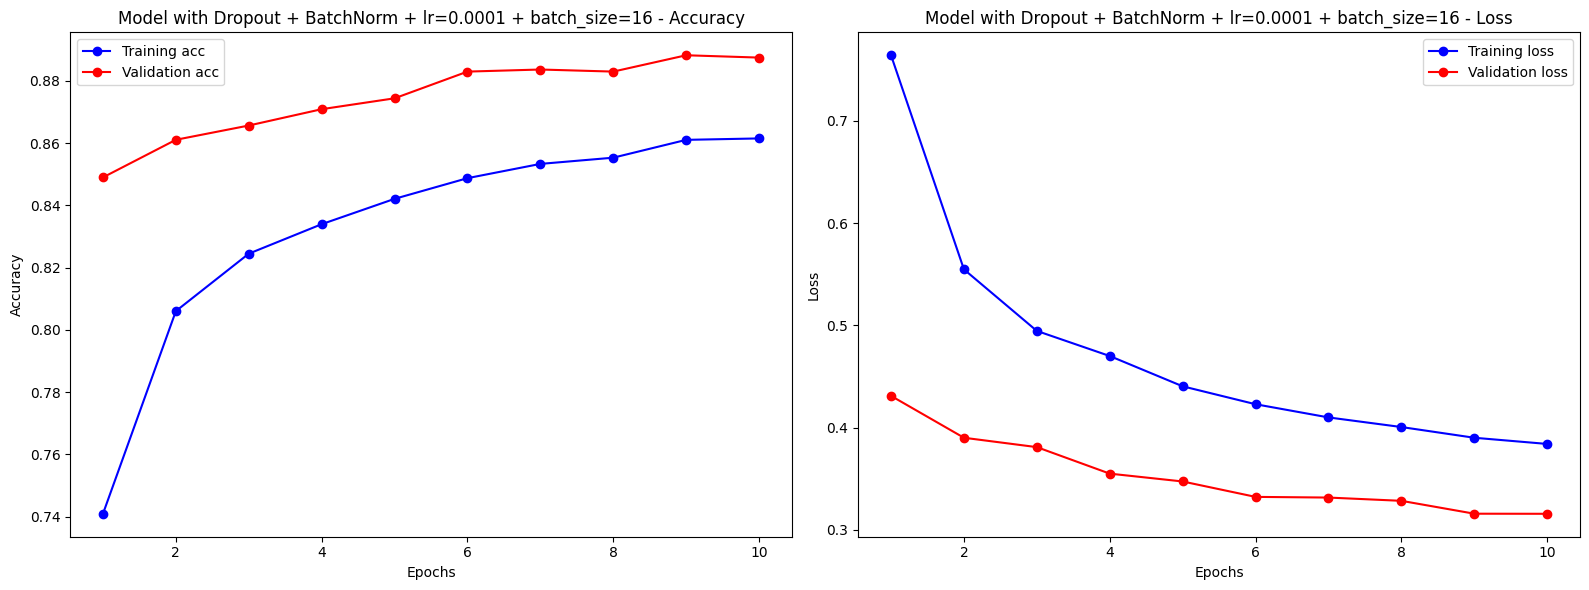

In [65]:
# Evaluate the model
val_loss, val_acc = reg_model_lr_16.evaluate(X_val, y_val)
# Evaluate the model on the test set
test_loss, test_acc = reg_model_lr_16.evaluate(X_test, y_test)
print("Validation loss:", val_loss, "Validation accuracy:", val_acc)
print("Test loss:      ", test_loss, "Test accuracy:     ", test_acc)
plot_training_curves(history, 'Model with Dropout + BatchNorm + lr=0.0001 + batch_size=16')

In [66]:
reg_model_lr_16001 = build_with_regularization_lr16(0.001)
callback = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = reg_model_lr_16001.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback], verbose=1)

Epoch 1/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7333 - loss: 0.7574 - val_accuracy: 0.8484 - val_loss: 0.4218
Epoch 2/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8113 - loss: 0.5308 - val_accuracy: 0.8555 - val_loss: 0.3943
Epoch 3/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8233 - loss: 0.4896 - val_accuracy: 0.8486 - val_loss: 0.4041
Epoch 4/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8256 - loss: 0.4803 - val_accuracy: 0.8522 - val_loss: 0.4014
Epoch 5/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8352 - loss: 0.4595 - val_accuracy: 0.8607 - val_loss: 0.3798
Epoch 6/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8384 - loss: 0.4501 - val_accuracy: 0.8689 - val_loss: 0.3611
Epoch 7/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8449 - loss: 0.4294 - val_accuracy: 0.8678 - val_loss: 0.3604
Epoch 8/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8437 - 

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3105
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.3443
Validation loss: 0.30919843912124634 Validation accuracy: 0.8891666531562805
Test loss:       0.3479121923446655 Test accuracy:      0.8736000061035156


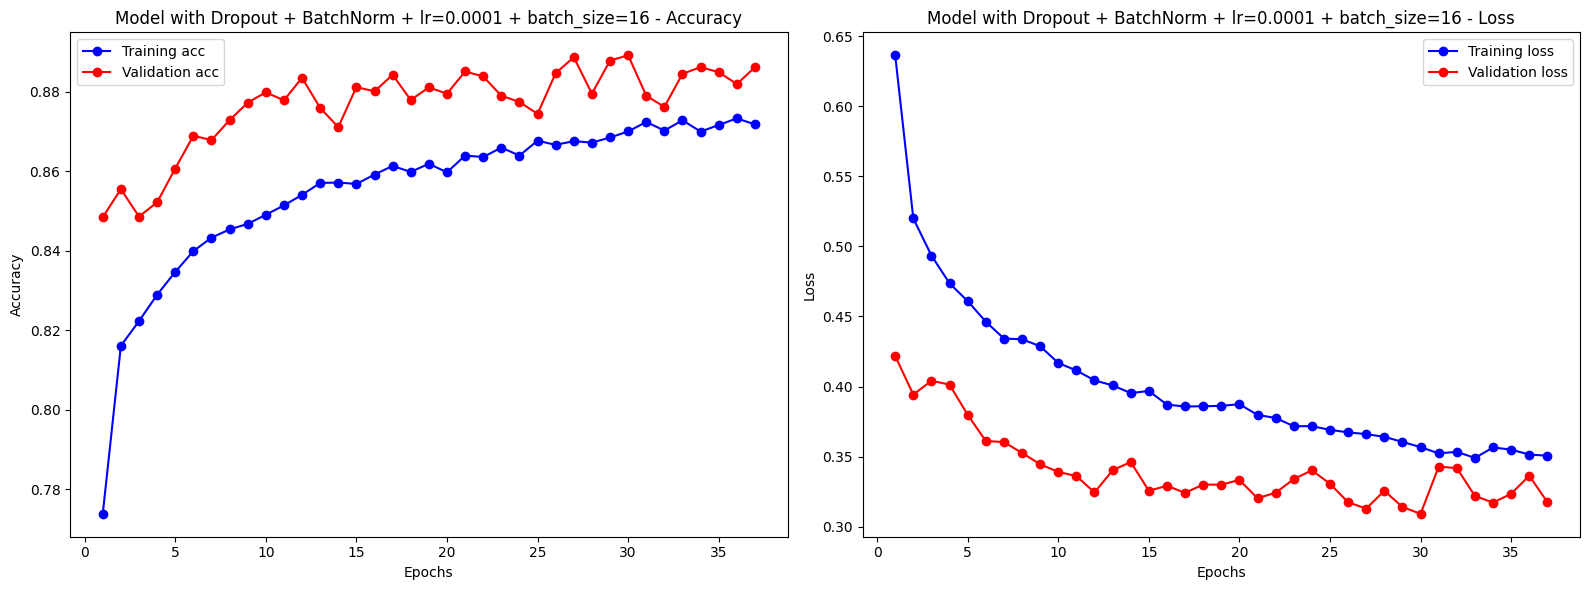

In [67]:
# Evaluate the model
val_loss, val_acc = reg_model_lr_16001.evaluate(X_val, y_val)
# Evaluate the model on the test set
test_loss, test_acc = reg_model_lr_16001.evaluate(X_test, y_test)
print("Validation loss:", val_loss, "Validation accuracy:", val_acc)
print("Test loss:      ", test_loss, "Test accuracy:     ", test_acc)
plot_training_curves(history, 'Model with Dropout + BatchNorm + lr=0.0001 + batch_size=16')

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


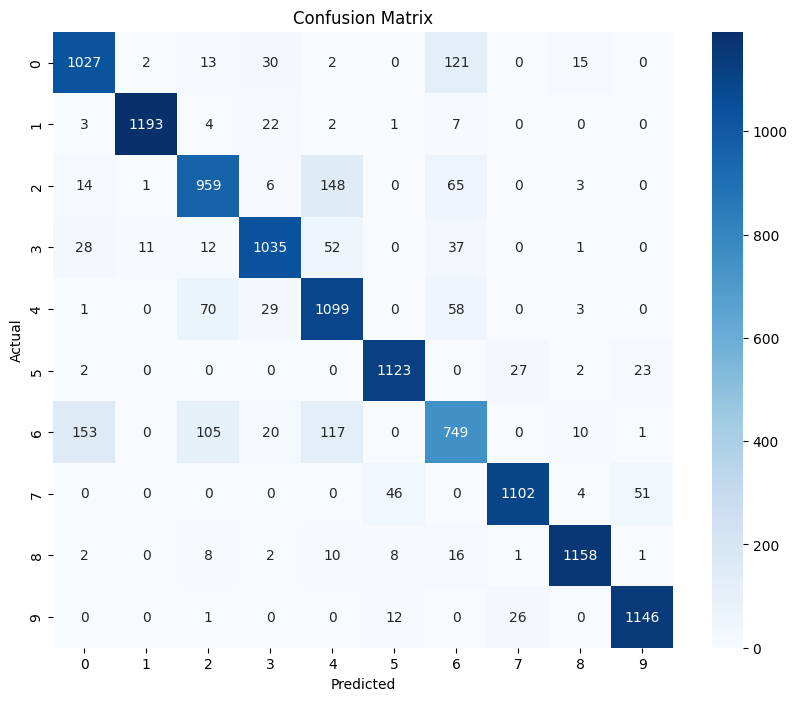

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1210
           1       0.99      0.97      0.98      1232
           2       0.82      0.80      0.81      1196
           3       0.90      0.88      0.89      1176
           4       0.77      0.87      0.82      1260
           5       0.94      0.95      0.95      1177
           6       0.71      0.65      0.68      1155
           7       0.95      0.92      0.93      1203
           8       0.97      0.96      0.96      1206
           9       0.94      0.97      0.95      1185

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels
y_pred = model.predict(X_val).argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_val, y_pred))


#### **classification report and confusion matrix**, and tie it back to why we care beyond just accuracy.

---

## 🔁 Quick Recap: Confusion Matrix

It's a table that tells you:

- **What the model predicted** vs. **what was actually true**
- Especially helpful in **multi-class classification**

Each row → actual class  
Each column → predicted class

So you can directly **spot errors** like:
- Class 4 being misclassified as 6
- Class 2 overlapping with 3, etc.

---

## 📊 What the Report Tells You

Let’s break down your output by metric:

| Metric       | Meaning                                                                 |
|--------------|-------------------------------------------------------------------------|
| **Precision** | Of the predictions for class X, how many were actually X?              |
| **Recall**    | Of all actual instances of class X, how many were predicted correctly? |
| **F1-Score**  | Harmonic mean of Precision & Recall — balances false positives & false negatives |
| **Support**   | Number of actual instances of each class in your test data            |

---

## 📌 Observations from Your Output

### 🔺 Best Performing Classes:
- **Class 1, 5, 8, 9**  
  → Almost perfect scores (~0.97–0.99)  
  → Your model *loves* recognizing them

### 🔻 Weaker Classes:
- **Class 6:**  
  - Precision: 0.74, Recall: 0.69  
  - May be getting confused with 4 or 0

- **Class 4:**  
  - Recall is low: 0.76  
  - Model struggles to *correctly find all 4s*

These would be clearly visible as *off-diagonal* values in the **confusion matrix plot** — worth checking visually if you haven’t yet.

---

## 📌 Why Accuracy Alone Isn’t Enough

Let’s say Class 6 was only 2% of your data. A model that ignores Class 6 entirely could still hit high accuracy!

Hence, confusion matrix + precision/recall:
- Let you **debug the model behavior per class**
- Identify whether misclassifications are **critical or tolerable**

---

## 🔎 What You Could Try Next

1. **Visualize the confusion matrix** using:
```python
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', xticks_rotation=45)
```

2. **Plot misclassified samples** to *see* what confused the model:
```python
# Show some wrong predictions
wrong = np.where(y_pred != y_true)[0]
for i in wrong[:5]:
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_true[i]} | Pred: {y_pred[i]}")
    plt.show()
```

3. Investigate **confusion between specific class pairs** like 4 vs. 6

---


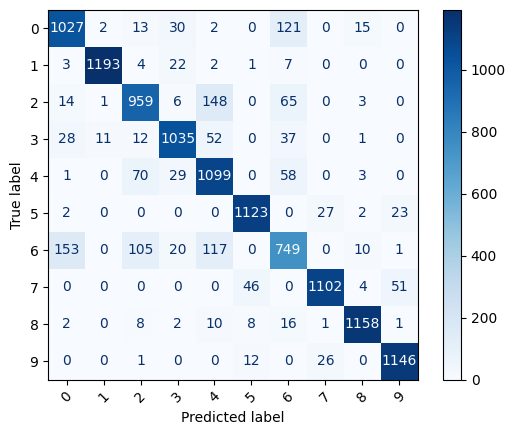

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues', xticks_rotation=45)

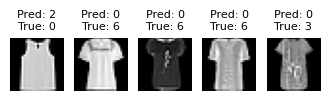

In [70]:
# Show some wrong predictions
wrong = np.where(y_pred != y_val)[0]
plt.figure(figsize=(4,10))
num_count = 1
for i in wrong[:5]:
    plt.subplot(1, 5, num_count)
    plt.imshow(X_val[i], cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_val[i]}", fontsize=8)
    plt.axis('off')
    num_count += 1
plt.show()